In [22]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sbs
import torch

In [23]:
fvmaxs = [0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
joint_pos = []
for fvmax in fvmaxs:
    joint_pos.append(pd.read_csv(f"finetuning_{fvmax}.csv", delimiter=";", header=None).astype(np.float64).to_numpy())

joint_pos = np.array(joint_pos).squeeze(2).T

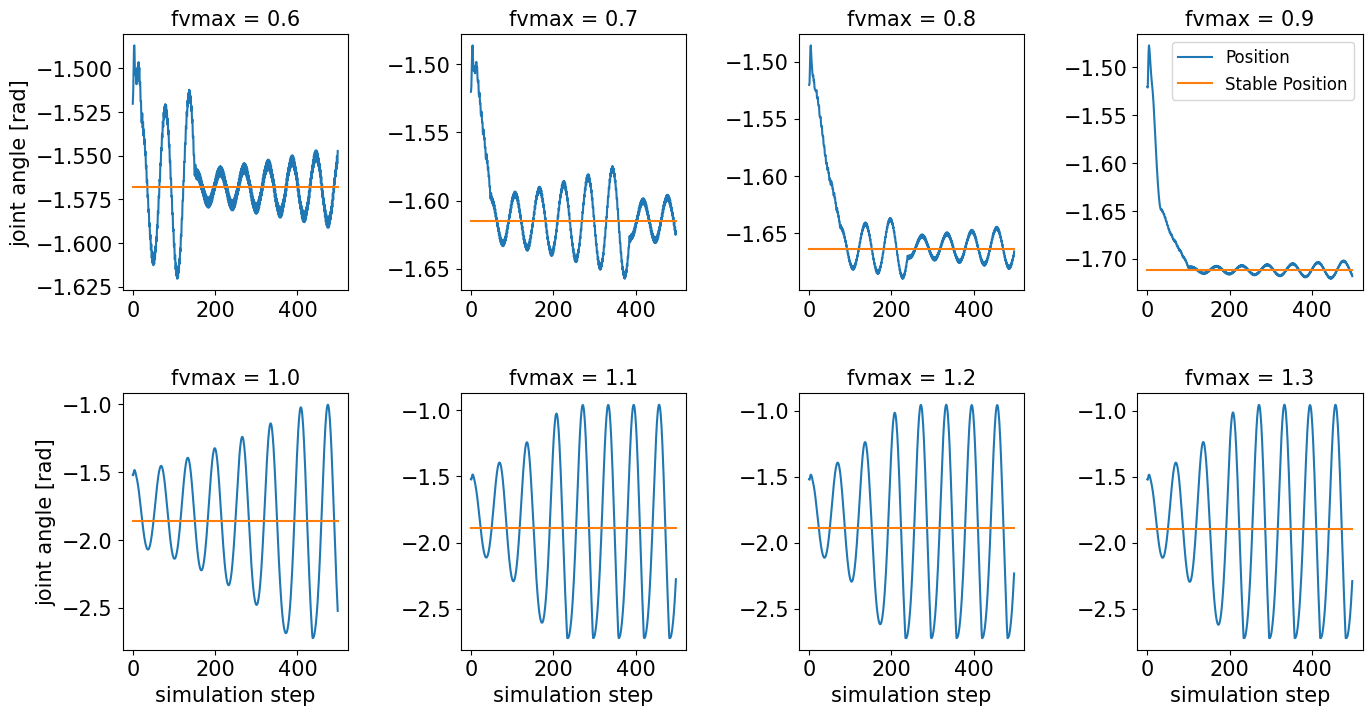

In [24]:
rows = 2
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(16, 8))

fig.subplots_adjust(wspace=0.5, hspace=0.4)

#fig.suptitle("Fine Tuning fvmax", fontsize=20)

for i, col in enumerate(joint_pos.T):
    ax[i // cols, i % cols].plot(col, label = 'Position')
    ax[i // cols, i % cols].plot([np.mean(col[100:])] * joint_pos.shape[0], label="Stable Position")

    
    

    ax[i // cols, i % cols].set_title(f"fvmax = {fvmaxs[i]}", fontsize=15)

    ax[i // cols, i % cols].tick_params(axis='x', labelsize=15)
    ax[i // cols, i % cols].tick_params(axis='y', labelsize=15)
    if i == 3:
        ax[i // cols, i % cols].legend(fontsize=12)
    if i % cols == 0:
        ax[i // cols, i % cols].set_ylabel("joint angle [rad]", fontsize=15)

    if i // cols == 1:
        ax[i // cols, i % cols].set_xlabel("simulation step", fontsize=15)



In [25]:
free_running_jp = pd.read_csv(f"free_running.csv", delimiter=";", header=None).astype(np.float64).to_numpy()

In [26]:
free_running_jp.shape

(499, 1)

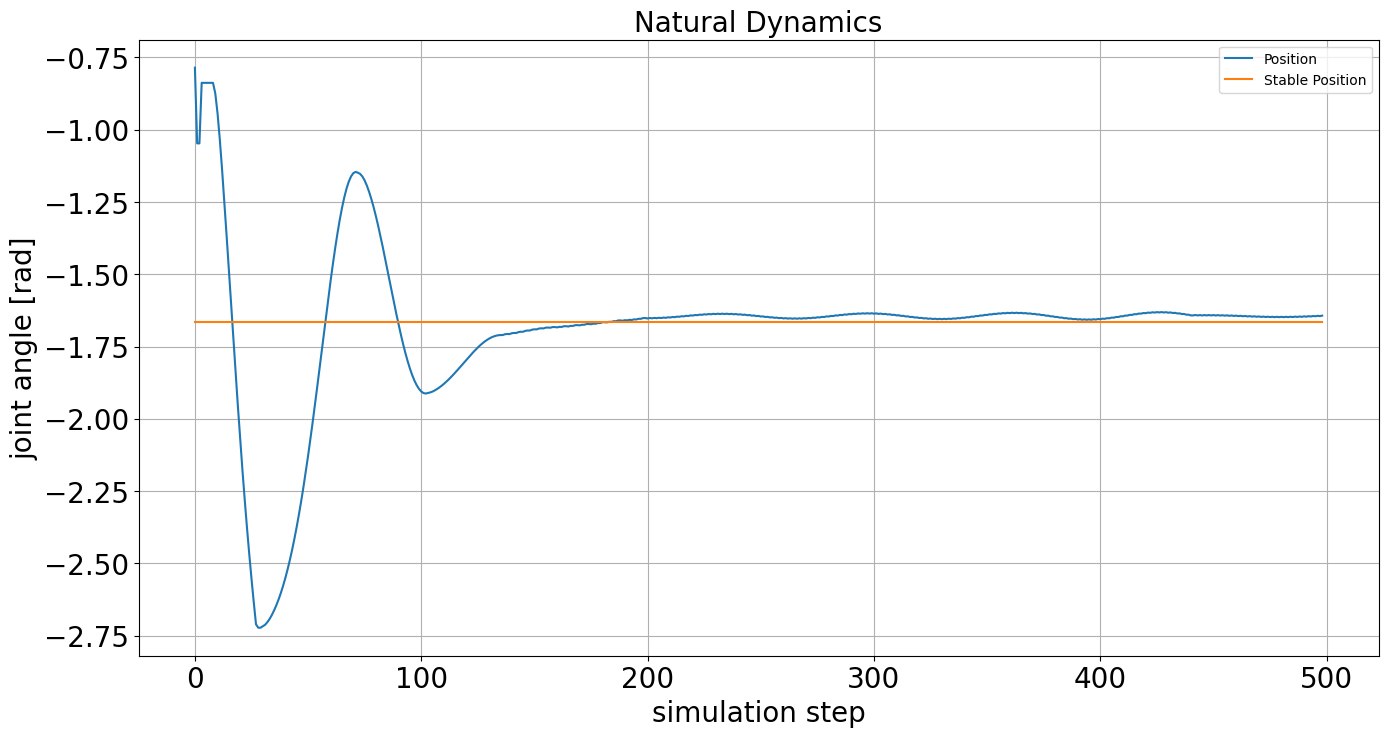

In [27]:
rows = 1
cols = 1
fig, ax = plt.subplots(rows, cols, figsize=(16, 8))

fig.subplots_adjust(wspace=0.3, hspace=0.5)

ax.plot(free_running_jp[:, 0], label = 'Position')
ax.plot([np.mean(free_running_jp[100:, 0])] * free_running_jp.shape[0], label="Stable Position")
ax.set_title("Natural Dynamics", fontsize=20)

ax.set_ylabel("joint angle [rad]", fontsize=20)
ax.set_xlabel("simulation step", fontsize=20)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

ax.grid(True)
ax.legend()


In [28]:
goal_commands = pd.read_csv("joint_comm_muscle_follow.csv", delimiter=";", header=None).astype(np.float64).to_numpy()
curr_joint_pos = pd.read_csv("joint_pos_muscle_follow.csv", delimiter=";", header=None).astype(np.float64).to_numpy()

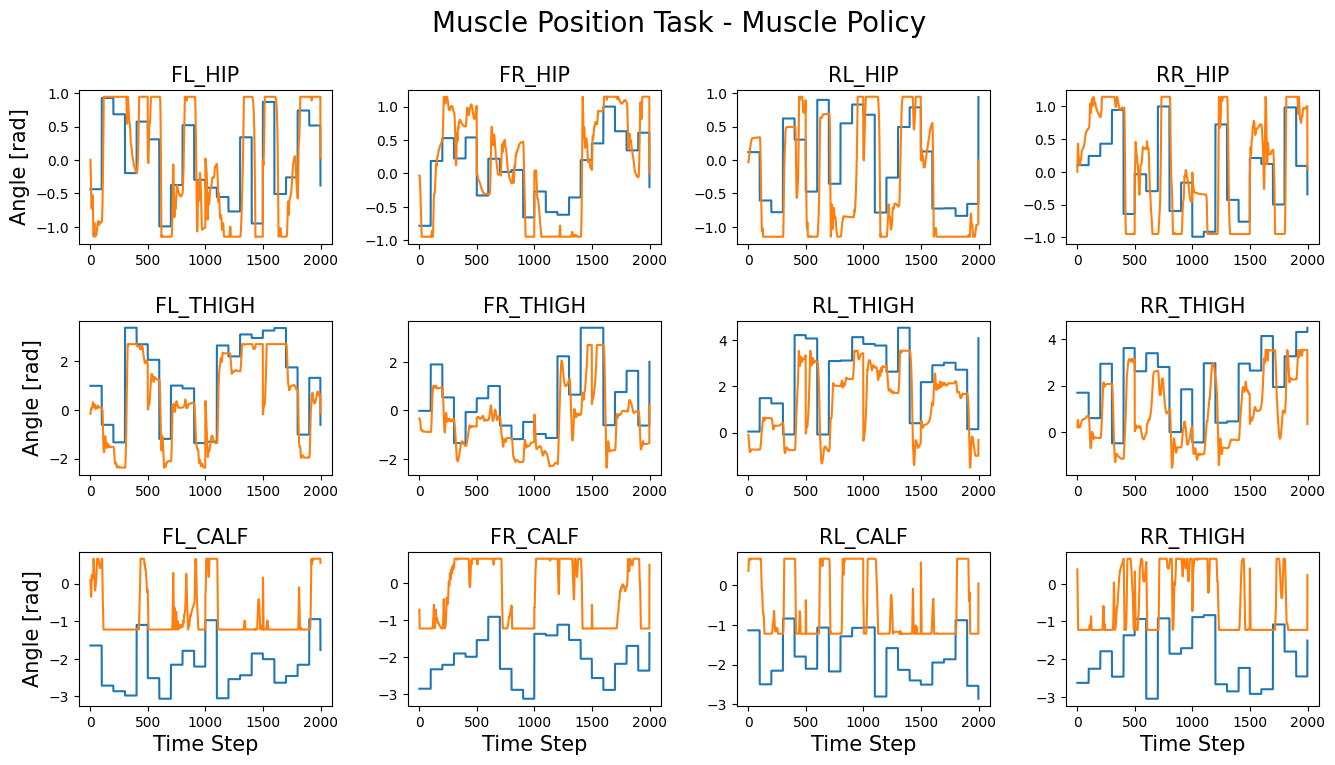

In [29]:
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(16, 8))

names = ["FL_HIP", "FR_HIP", "RL_HIP", "RR_HIP", "FL_THIGH", "FR_THIGH", "RL_THIGH", "RR_THIGH", "FL_CALF", "FR_CALF", "RL_CALF", "RR_THIGH"]

fig.subplots_adjust(wspace=0.3, hspace=0.5)

fig.suptitle("Muscle Position Task - Muscle Policy", fontsize=20)

for i, col in enumerate(goal_commands.T):
    ax[i // cols, i % cols].plot(col[1000:3000], label = 'Command Angle')
    ax[i // cols, i % cols].plot(curr_joint_pos[1000:3000, i], label="Actual Angle")

    ax[i // cols, i % cols].set_title(f"{names[i]}", fontsize=15)

    # if i == 3:
    #     ax[i // cols, i % cols].legend(loc='upper left', bbox_to_anchor=(0.0, 1.8), fontsize=15)
    if i % cols == 0:
        ax[i // cols, i % cols].set_ylabel("Angle [rad]", fontsize=15)
    if i // cols == 2:
        ax[i // cols, i % cols].set_xlabel("Time Step", fontsize=15)



In [30]:
goal_commands = pd.read_csv("joint_comm_torque_follow.csv", delimiter=";", header=None).astype(np.float64).to_numpy()
curr_joint_pos = pd.read_csv("joint_pos_torque_follow.csv", delimiter=";", header=None).astype(np.float64).to_numpy()

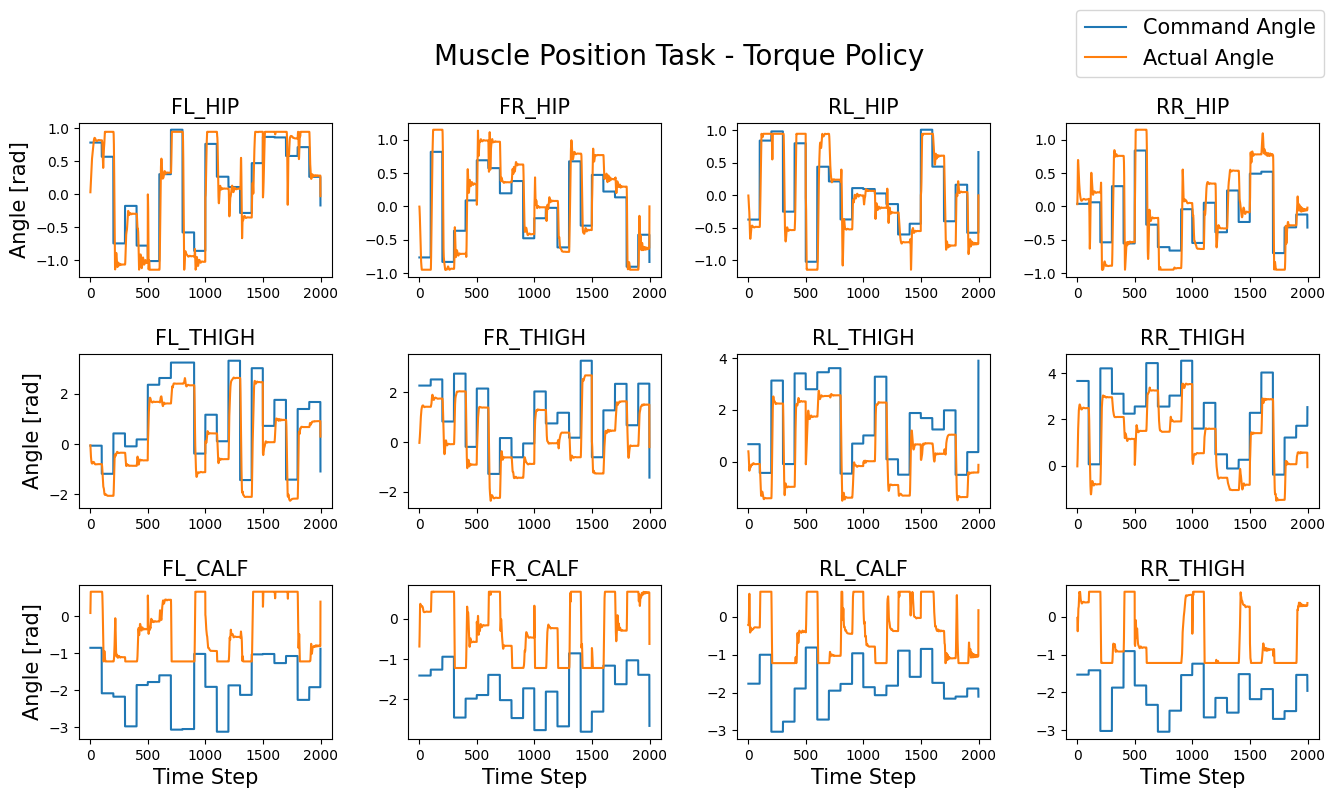

In [31]:
rows = 3
cols = 4
fig, ax = plt.subplots(rows, cols, figsize=(16, 8))

names = ["FL_HIP", "FR_HIP", "RL_HIP", "RR_HIP", "FL_THIGH", "FR_THIGH", "RL_THIGH", "RR_THIGH", "FL_CALF", "FR_CALF", "RL_CALF", "RR_THIGH"]

fig.subplots_adjust(wspace=0.3, hspace=0.5)

fig.suptitle("Muscle Position Task - Torque Policy", fontsize=20)

for i, col in enumerate(goal_commands.T):
    ax[i // cols, i % cols].plot(col[1000:3000], label = 'Command Angle')
    ax[i // cols, i % cols].plot(curr_joint_pos[1000:3000, i], label="Actual Angle")

    ax[i // cols, i % cols].set_title(f"{names[i]}", fontsize=15)

    if i == 3:
        ax[i // cols, i % cols].legend(loc='upper left', bbox_to_anchor=(0.0, 1.8), fontsize=15)
    if i % cols == 0:
        ax[i // cols, i % cols].set_ylabel("Angle [rad]", fontsize=15)
    if i // cols == 2:
        ax[i // cols, i % cols].set_xlabel("Time Step", fontsize=15)

In [32]:
curr_joint_pos = pd.read_csv("foot_pos.csv", delimiter=";", header=None).astype(np.float64).to_numpy()

In [83]:
def threshold_array(arr, t):
    return np.where(arr >= t, 1, 0)

foot_array = threshold_array(curr_joint_pos[900:1200, :], 0.023)

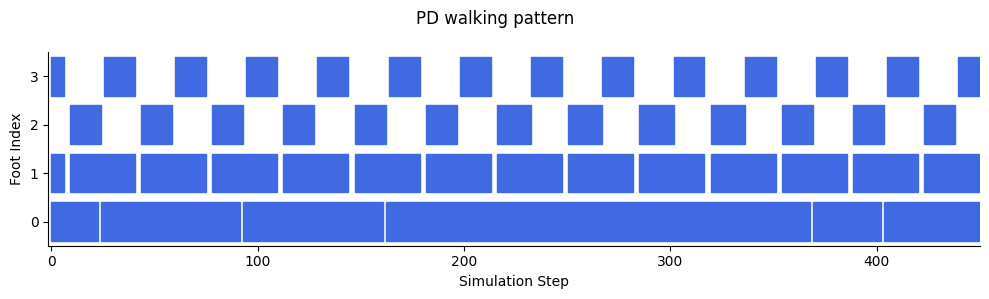

In [92]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Example data: Replace these with your actual 4 arrays
foot1 = foot_array[:, 0]
foot2 = foot_array[:, 1]
foot3 = foot_array[:, 2]
foot4 = foot_array[:, 3]

# Combine data into a list
data = [foot1, foot2, foot3, foot4]

# Parameters
n_foot = len(data)  # Number of feet
t = len(foot1)  # Number of timesteps
spacing = 1.5  # Horizontal distance between individual graphs

# Create the plot
fig, ax = plt.subplots(figsize=(10, 3))
fig.suptitle("PD walking pattern", fontsize=20)

for i, foot in enumerate(data):
    for j, contact in enumerate(foot):
        if contact == 1:
            # Add a rectangle for each contact point
            rect = patches.Rectangle((j * spacing, i - 0.4), spacing, 0.8, color="royalblue")
            ax.add_patch(rect)

# Set axis limits
ax.set_xlim(-spacing, t * spacing)
ax.set_ylim(-0.5, n_foot - 0.5)

# Add labels and ticks
ax.set_yticks(range(n_foot))
ax.set_yticklabels([f"{i}" for i in range(n_foot)])
ax.set_xlabel("Simulation Step", fontsize=15)
ax.set_ylabel("Foot Index", fontsize=15)

# Clean up layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()